In [5]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [6]:
root = '/Volumes/EDDropbox/Data/'
os.chdir(root)
data_dir = os.path.join(root,'scfmi4/')
figure_dir = os.path.join(root,'scfmi4/figures/')

In [7]:
filelist = glob.glob(data_dir+'*.bin')
filelist.sort(key=lambda f: f[len(data_dir):-4].lower())
for f in filelist:
    print '\'{0}\''.format(f[len(data_dir):]), '{:0.1f}MB'.format(os.path.getsize(f)/1e6)

'cooldown_4-20-6_a.bin' 0.0MB
'cooldown_4-20-6_b.bin' 0.0MB
'cooldown_4-20-6_c.bin' 0.1MB
'cooldown_4-20-6_d.bin' 0.0MB
'cooldown_4-20-6_e.bin' 0.0MB
'gateswp_4-20-6_300K_a.bin' 0.1MB
'gateswp_4-20-6_300K_b.bin' 0.1MB
'gateswp_4-20-6_300K_c.bin' 0.1MB
'gateswp_4-20-6_300K_d.bin' 0.1MB
'gateswp_4-20-6_300K_e.bin' 0.1MB
'gateswp_4-20-6_4K_a.bin' 0.0MB
'gateswp_4-20-6_4K_b.bin' 0.0MB
'gateswp_4-20-6_4K_c.bin' 0.0MB
'gateswp_4-20-6_4K_d.bin' 0.2MB
'gateswp_4-20-6_4K_e.bin' 1.0MB


# Device Images

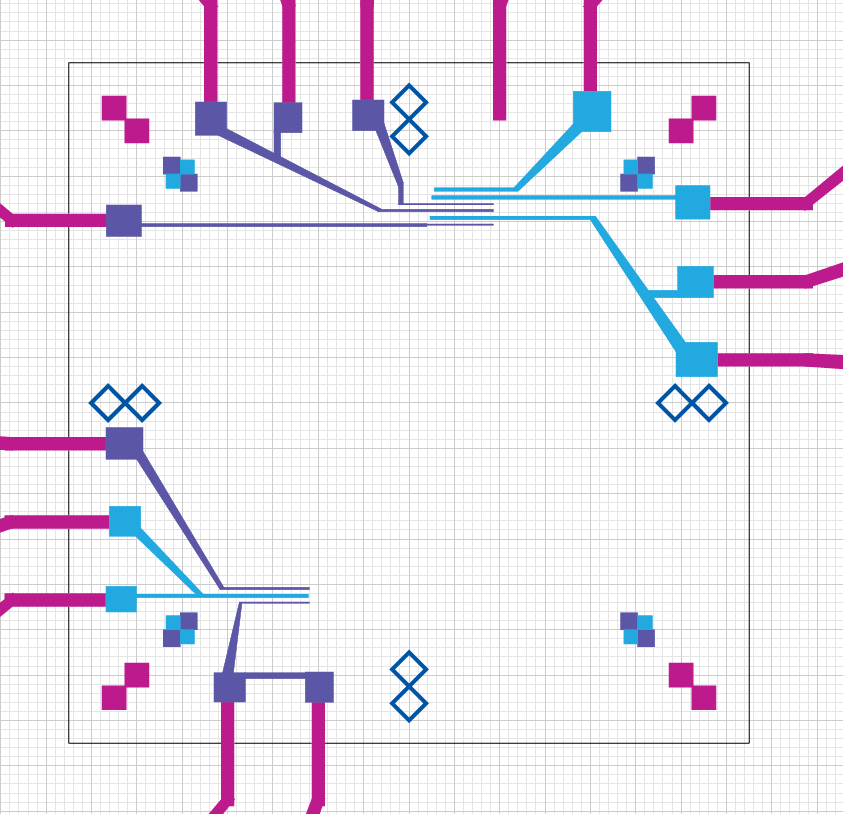

In [9]:
from IPython.display import Image, display

display(Image(figure_dir+'scfmi4_q4.PNG', width=500))

The blue leads are Ti/Nb, purple leads are Co/Au. The red handwritten numbers are the same referenced in the seciton headings in this document. This thing is in the dunker/Reich lab magnet. The magnetic field points from right to left.

# 4-20 Co/Co

In [10]:
reload(lvdt)

<module 'lvdatatools' from '/Users/nik/Dropbox/Repos/lvdatatools/lvdatatools.pyc'>

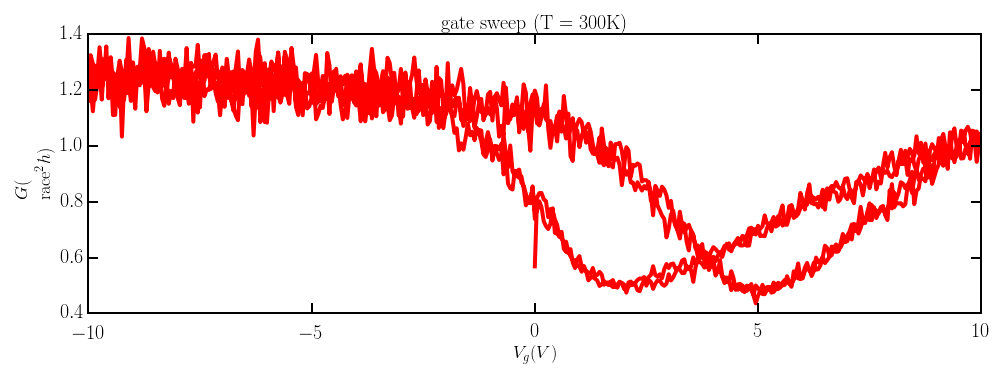

In [11]:
f = data_dir+'gateswp_4-20-6_300K_e.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Gavg']/3.875e-5, c = 'r')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep (T = 300K)')
ax.set_xlabel('$V_g (V)$')
ax.set_ylabel('$G (\frac{e^2}{h})$')
#ax.legend()

This looks pretty good. Seems to be a normal looking small band gap semiconducting nanotube. The gate sweep here was run several times and does not seem to show any drifting or capacitive charging behavior.

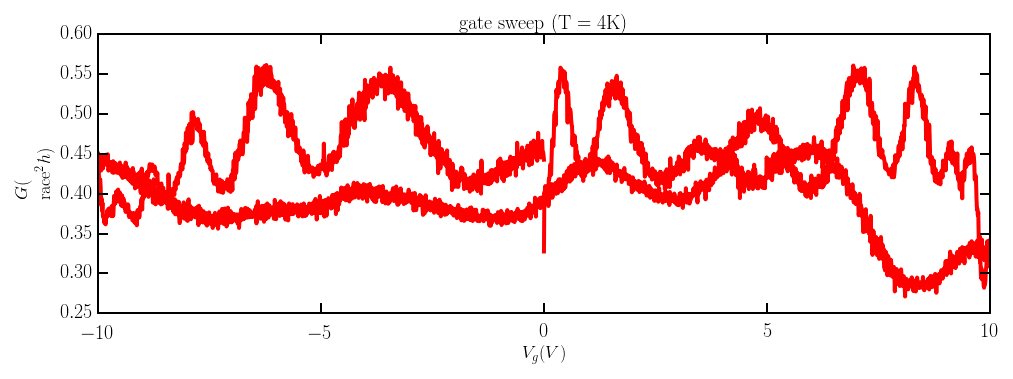

In [12]:
f = data_dir+'gateswp_4-20-6_4K_d.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Gavg']/3.874e-5, c = 'r')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep (T = 4K)')
ax.set_xlabel('$V_g (V)$')
ax.set_ylabel('$G (\frac{e^2}{h})$')
#ax.legend()

The gate goes from 0 -> 10V -> 0 -> -10V -> 0 

Here it is versus time...

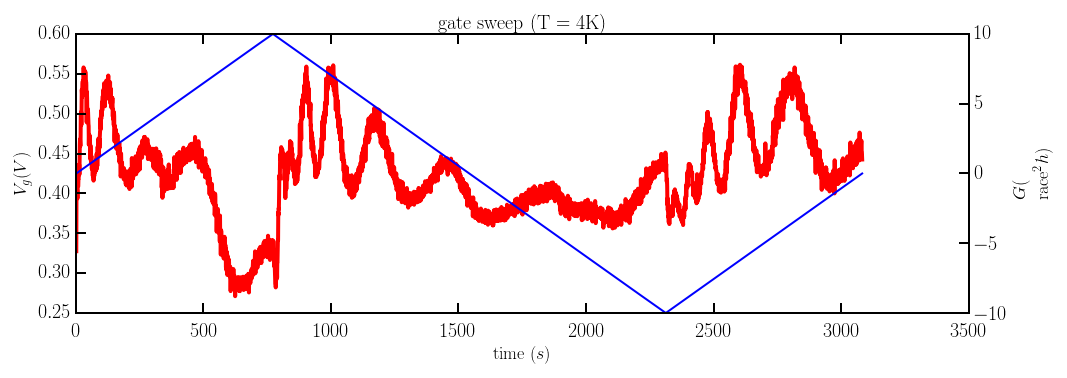

In [13]:
f = data_dir+'gateswp_4-20-6_4K_d.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
ax.plot(gateswp['t0'], gateswp['Gavg']/3.875e-5, c = 'r')
ax2.plot(gateswp['t0'], gateswp['Gate'], c = 'b', lw = 2)
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep (T = 4K)')
ax.set_xlabel('time $(s)$')
ax.set_ylabel('$V_g (V)$')
ax2.set_ylabel('$G (\frac{e^2}{h})$')
#ax.legend()

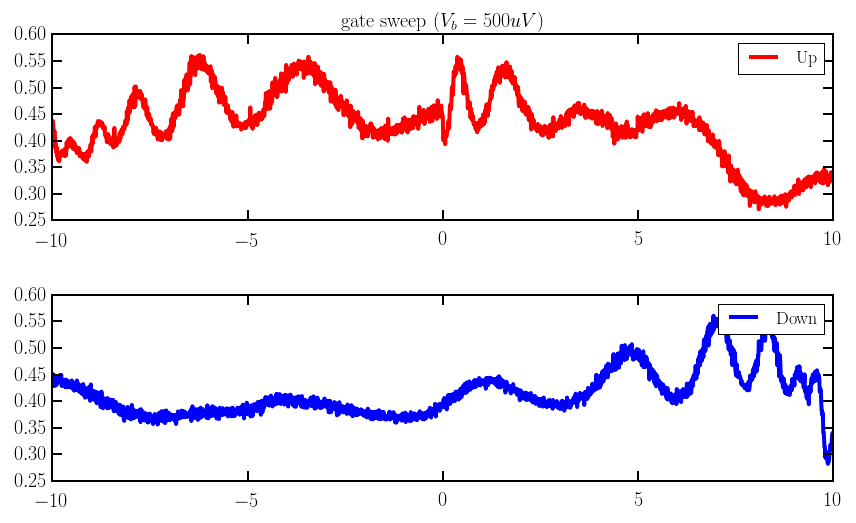

In [18]:
gateswp = lvdt.get_data_2d(f)
gateswp['dir'] = (gateswp['Gate']-gateswp['Gate'].shift()).fillna(0)
upswp = gateswp[gateswp['dir'] > 0].sort('Gate')
downswp = gateswp[gateswp['dir'] < 0].sort('Gate')

fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.4)

ax1 = fig.add_subplot(2,1,1)
ax1.plot(upswp['Gate'], upswp['Gavg']/3.875e-5, c = 'r', label = 'Up')
ax1.set_xlim(-10,10)
ax1.set_title('gate sweep $(V_b = 500uV)$')
#ax.set_xlabel('$V_g (V)$')
ax.set_ylabel('$G (\frac{e^2}{h})$')
ax1.legend(fontsize = 18)

ax2 = fig.add_subplot(2,1,2, sharex = ax1)
ax2.plot(downswp['Gate'], downswp['Gavg']/3.875e-5, c = 'b', label = 'Down')
ax.set_xlabel('$V_g (V)$')
ax.set_ylabel('$G (\frac{e^2}{h})$')
ax2.legend(fontsize = 18)
# fig.savefig(data_dir+'4K_gate_a'+'.png', dpi=200)

Here are a bunch of sweeps, just to confirm that the behavior is the same as last time...

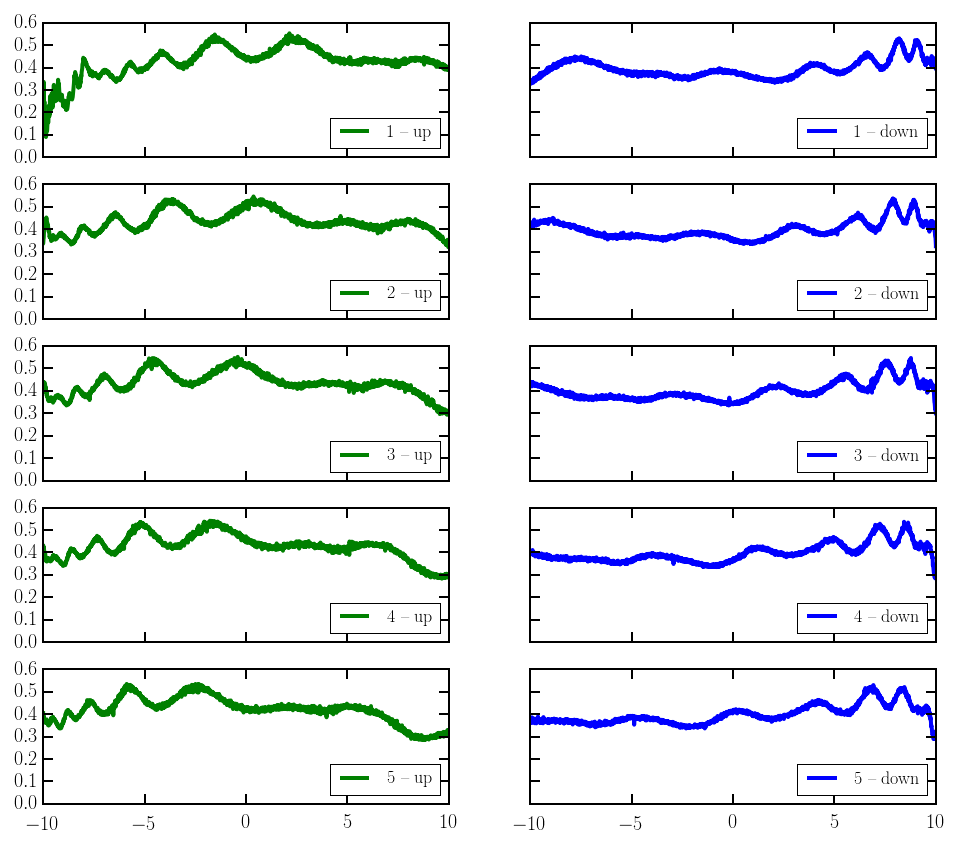

In [19]:
f = data_dir+'gateswp_4-20-6_4K_e.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 up and 5 down sweeps in here

fig, axs = plt.subplots(5,2,sharex = True, sharey=True, 
                        figsize=(16,14))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i % 2 == 0:
        l = '{0} -- up'.format(i/2+1)
        c = 'g'
    else:
        l = '{0} -- down'.format((i-1)/2+1)
        c = 'b'
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Gavg'][ind[i]:ind[i+1]]/3.875e-5,
                c = c, label=l)
    axs[i].legend(loc = 'lower right', fontsize = 18)

Things I did differently from last time:

+ Replaced cinch connector and rewired everything from the 1K pot to the sample using a ribbon cable made of copper/nickel wire (same as all of the oxford stuff)
+ Removed all superfluous wiring on cryostat
+ Tested resistance and capacitance of all sample and temperature control lines against each other at room temperature
+ Isolated sample gate with GE varnish/cigarette paper
+ Used the SR830 to do an AC 2-probe measurement in hopes of removing some DC offset problems from the CV amp

It looks like this capacitive charging problem only happens at low temperatures.

Ideas:

+ Problem with some of the lines going from the Fischer connector (300K) to the 1K pot
+ Problem with chip carriers that have been soaked in acetone and used repeatedly
+ Problem with strip lines on 1K pot

# same sample, same leads, in the dunker

In [20]:
root = '/Volumes/EDDropbox/Data/'
os.chdir(root)
data_dir = os.path.join(root,'scfmi4/dunker/')
figure_dir = os.path.join(root,'scfmi4/figures/')

In [21]:
filelist = glob.glob(data_dir+'*.bin')
filelist.sort(key=lambda f: f[len(data_dir):-4].lower())
for f in filelist:
    print '\'{0}\''.format(f[len(data_dir):]), '{:0.1f}MB'.format(os.path.getsize(f)/1e6)

'cooldown_4-20-6_a.bin' 0.0MB
'cooldown_4-20-6_b.bin' 0.2MB
'cooldown_4-20-6_c.bin' 0.3MB
'gateswp_1-20-6_4K_a.bin' 0.2MB
'gateswp_4-20-6_4K_a.bin' 0.0MB
'gateswp_4-20-6_4K_b.bin' 0.1MB
'gateswp_4-20-6_4K_c.bin' 0.1MB
'gateswp_4-20-6_4K_d.bin' 0.1MB
'gateswp_4-20-6_4K_e.bin' 0.2MB
'gateswp_4-20-6_4K_f.bin' 0.2MB
'gateswp_4-20-6_4K_g.bin' 0.0MB
'gateswp_4-20-6_4K_h.bin' 0.2MB
'gateswp_4-20-6_4K_i.bin' 0.3MB
'gateswp_4-20-6_4K_t.bin' 0.0MB
'gateswp_4-20-6_4K_u.bin' 0.1MB
'gateswp_4-20-6_4K_v.bin' 0.3MB
'gateswp_4-20-6_4K_w.bin' 0.3MB


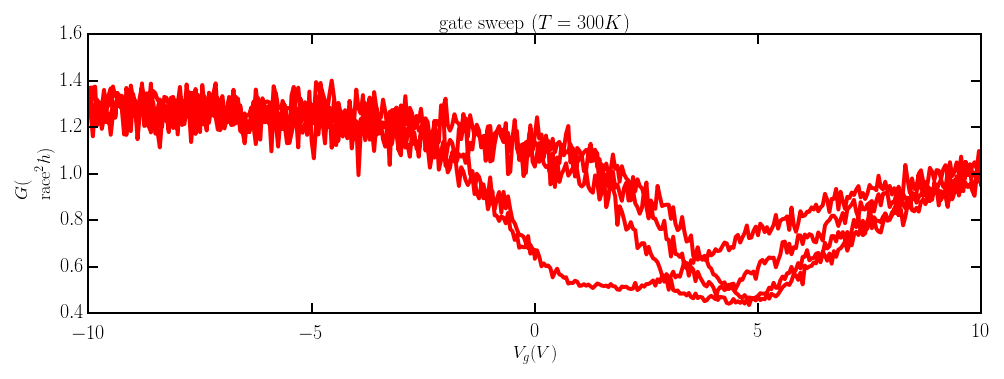

In [22]:
f = data_dir+'gateswp_4-20-6_4K_b.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Gavg']/3.875e-5, c = 'r')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep $(T = 300K)$')
ax.set_xlabel('$V_g (V)$')
ax.set_ylabel('$G (\frac{e^2}{h})$')
#ax.legend()

Alright... I'm going to run that again.

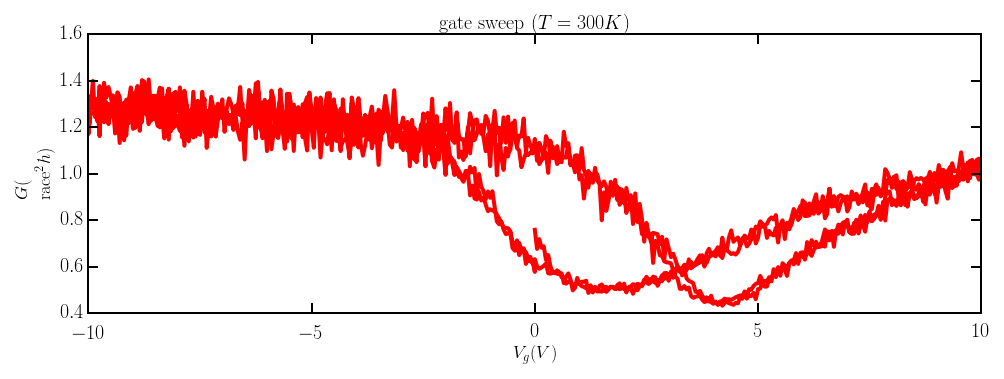

In [23]:
f = data_dir+'gateswp_4-20-6_4K_c.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Gavg']/3.875e-5, c = 'r')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep $(T = 300K)$')
ax.set_xlabel('$V_g (V)$')
ax.set_ylabel('$G (\frac{e^2}{h})$')
#ax.legend()

Ok. Maybe something is going on with my sample. One more time...

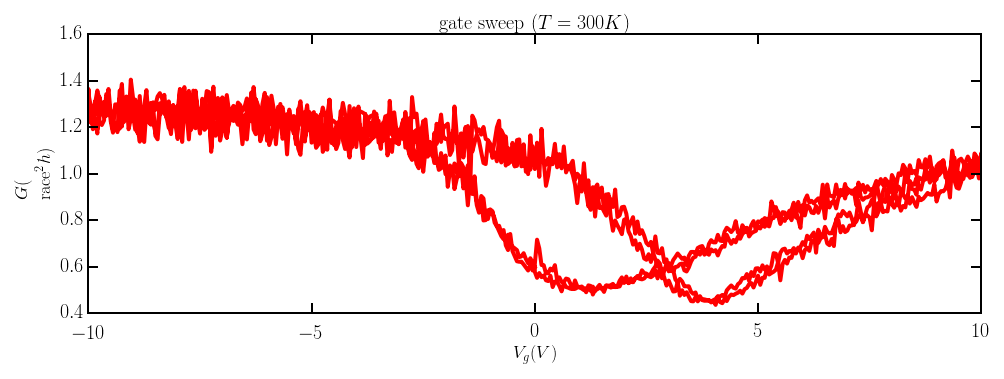

In [24]:
f = data_dir+'gateswp_4-20-6_4K_d.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Gavg']/3.875e-5, c = 'r')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep $(T = 300K)$')
ax.set_xlabel('$V_g (V)$')
ax.set_ylabel('$G (\frac{e^2}{h})$')
#ax.legend()

Seems to be pretty consistent now.

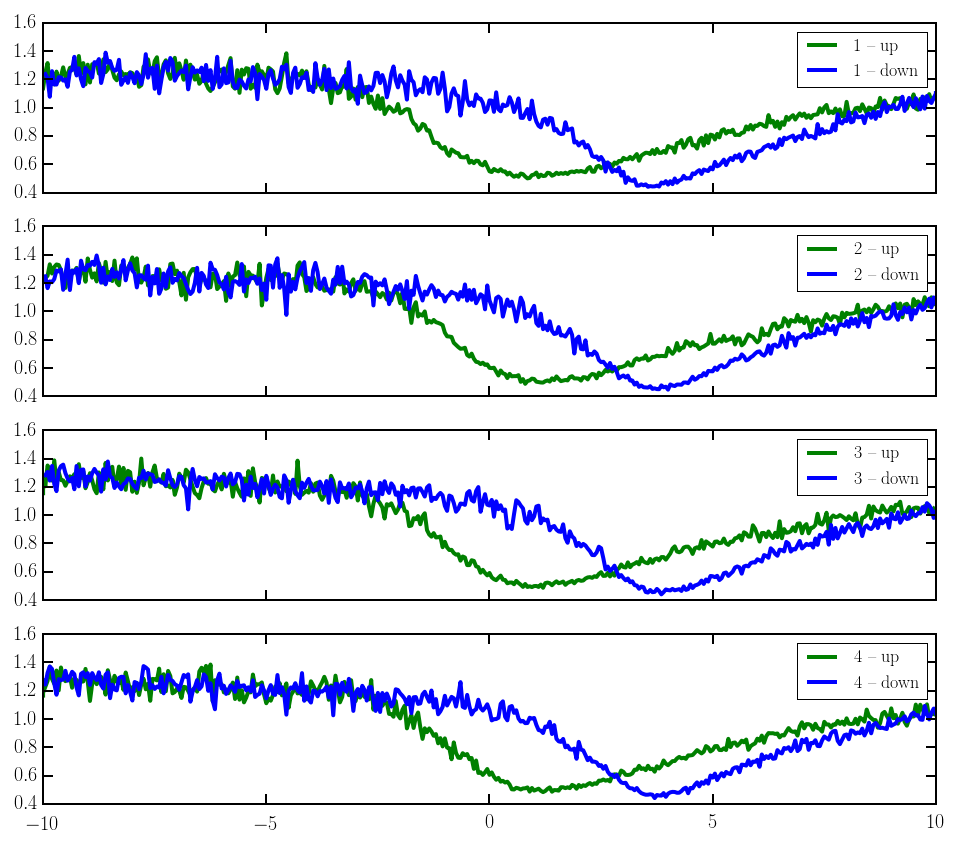

In [25]:
f = data_dir+'gateswp_4-20-6_4K_e.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 up and 5 down sweeps in here

fig, axs = plt.subplots(4,1,sharex = True, sharey=True, 
                        figsize=(16,14))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i % 2 == 0:
        j = i/2
        l = '{0} -- up'.format(j+1)
        c = 'g'
    else:
        j=(i-1)/2
        l = '{0} -- down'.format(j+1)
        c = 'b'
    axs[j].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Gavg'][ind[i]:ind[i+1]]/3.875e-5,
                c = c, label=l)
    axs[j].legend(fontsize = 18)

Looks pretty damn consistent. Cooling it down now.

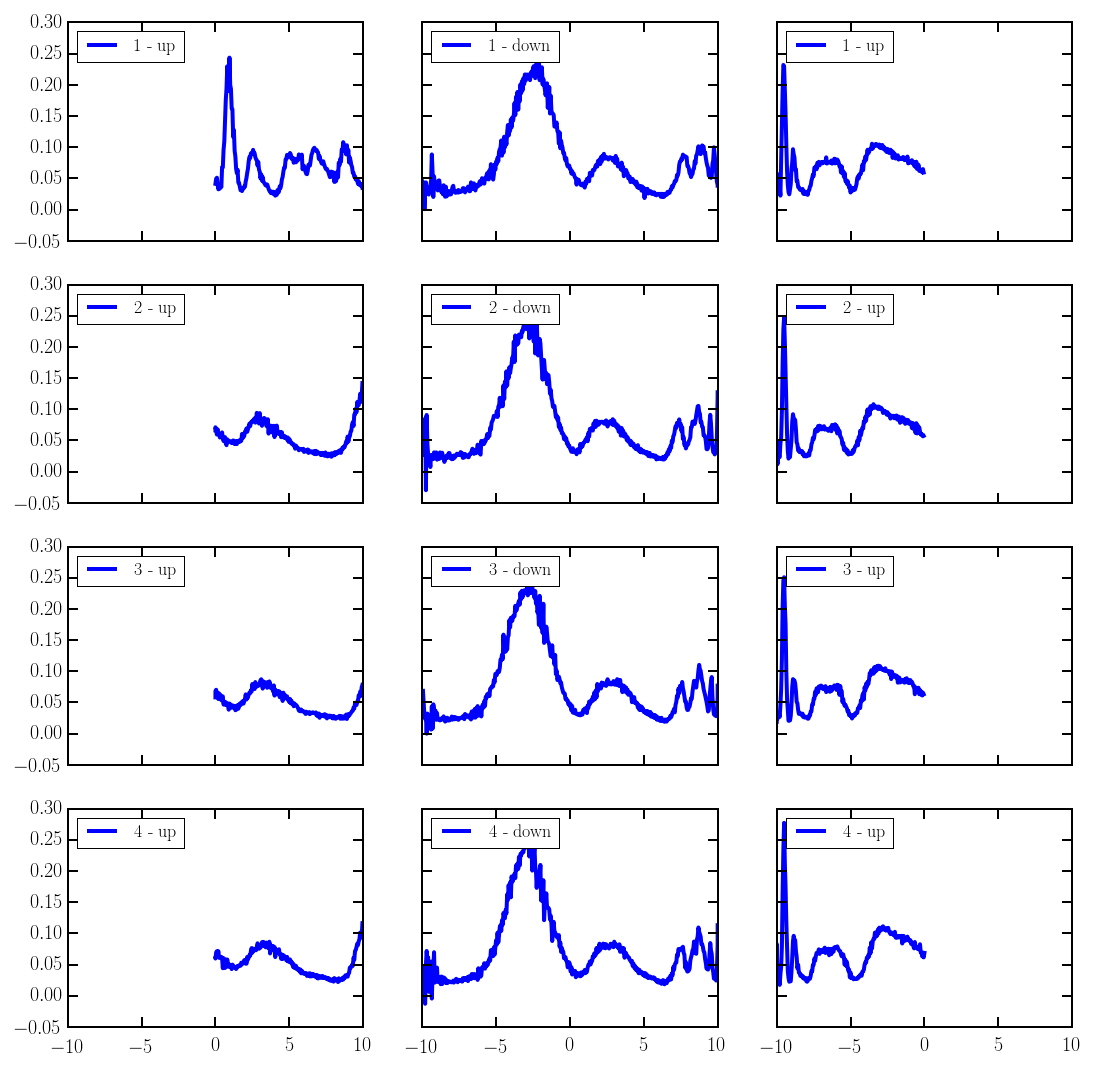

In [26]:
f = data_dir+'gateswp_4-20-6_4K_f.bin'

gateswp = lvdt.get_data_2d(f) #there are 4 'symmetric about start' sweeps in here

fig, axs = plt.subplots(4,3,sharex = True, sharey=True, 
                        figsize=(18,18))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3 + 1)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3 + 1)
    else:
        l = '{0:d} - up'.format((i-2)/3 + 1)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Gavg'][ind[i]:ind[i+1]]/3.875e-5,
                label=l)
    axs[i].legend(loc = 'upper left', fontsize = 18)

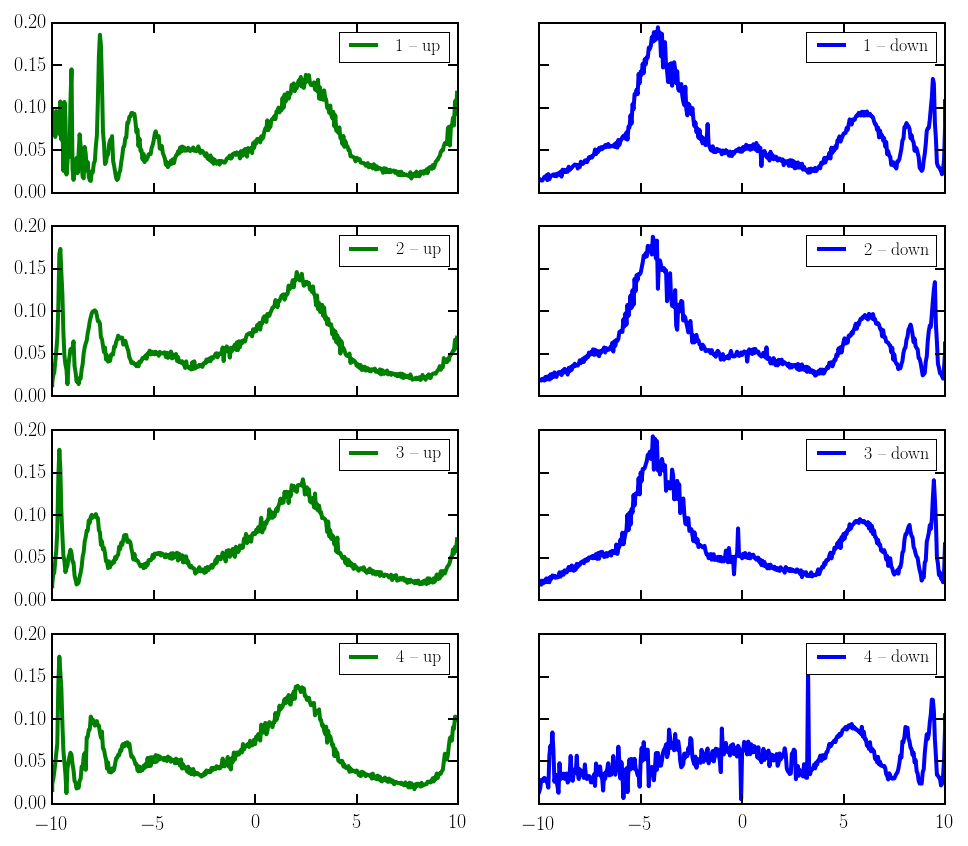

In [27]:
f = data_dir+'gateswp_4-20-6_4K_h.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 up and 5 down sweeps in here

fig, axs = plt.subplots(4,2,sharex = True, sharey=True, 
                        figsize=(16,14))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i % 2 == 0:
        l = '{0} -- up'.format(i/2+1)
        c = 'g'
    else:
        l = '{0} -- down'.format((i-1)/2+1)
        c = 'b'
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Gavg'][ind[i]:ind[i+1]]/3.875e-5,
                c = c, label=l)
    axs[i].legend(fontsize = 18)

Well, I can't say it drifts much, but it does have some clear charging/discharging effects.

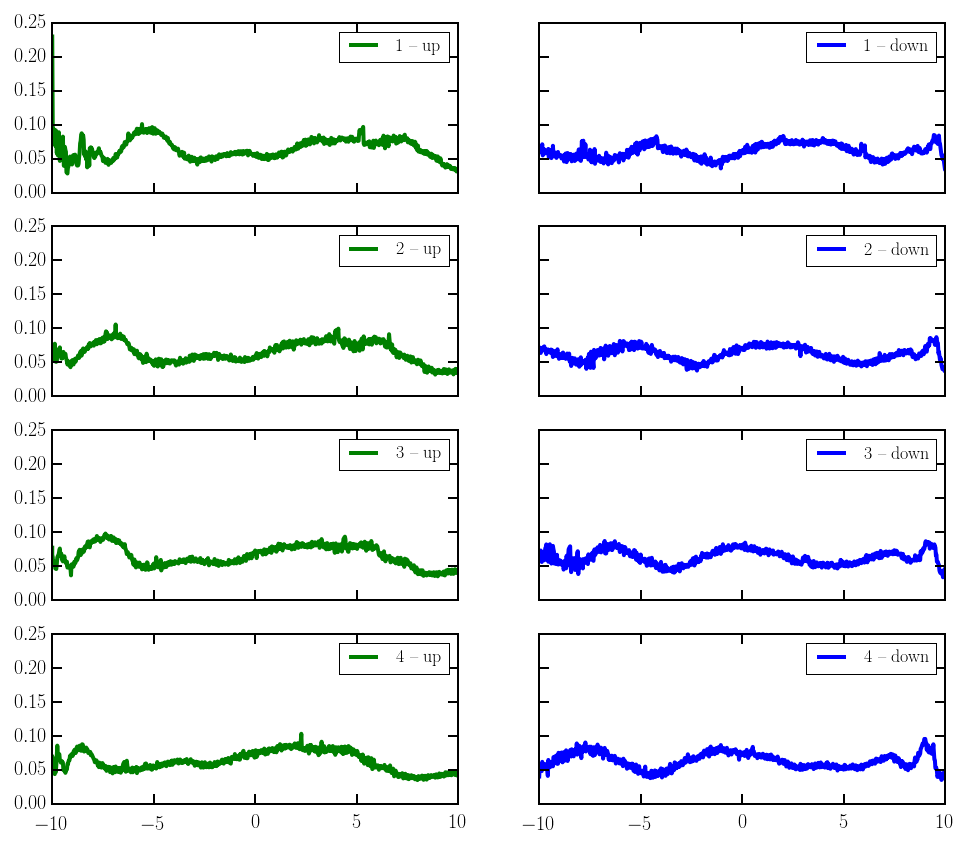

In [28]:
f = data_dir+'gateswp_4-20-6_4K_i.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 up and 5 down sweeps in here

fig, axs = plt.subplots(4,2,sharex = True, sharey=True, 
                        figsize=(16,14))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i % 2 == 0:
        l = '{0} -- up'.format(i/2+1)
        c = 'g'
    else:
        l = '{0} -- down'.format((i-1)/2+1)
        c = 'b'
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Gavg'][ind[i]:ind[i+1]]/3.875e-5,
                c = c, label=l)
    axs[i].legend(fontsize = 18)

Now it drifts. Looks just like the He3 data.

A table comparing the Pd-only sample that I have been using as a benchmark, the Py-Nb samples that showed this same behavior, and this sample.

|            -           |   Pd (scfmc3)  | Py-Nb (scfmh2) | Co-Nb (scfmi4) |
| ---------------------: | -------------: | -------------: | -------------: |
|   **sub cleaning**     | sonicate in acetone/IPA | sonicate in acetone/IPA | sonicate in acetone/IPA |
|      **markers**       | mask aligner (S1813), sputter Cr/Mo | mask aligner (S1813), sputter Cr/Mo | mask aligner (S1813), sputter Mo |
|     **catalyst**       | SEM (PMMA), drop cast from water solution | SEM (PMMA), drop cast from water solution | mask aligner (NR9), UV/OZ clean, drop cast from water solution |
|     **cnt growth**     | 15 minute pretreatment, 300 Ar/300 H2/ 740 CH4, 12 minute growth, small tube | 1 hr pretreatment, 350 Ar/350 H2/700 CH4, 10 minutes growth | 1 hr pretreatment, 350 Ar/350 H2/700 CH4, 10 minutes growth |
| **leads/bonding pads** | SEM (PMMA), Cr/Au evaporated (new)| SEM (PMMA), Cr/Au evaporated (old) | SEM (PMMA), UV/OZ clean, Cr/Au evaporated (old) | 
|    **cnt contacts **   | SEM (PMMA/room temp/scale dose), sputter Pd | SEM (PMMA/room temp/scale dose), evaporate Py (old), sputter Ti/Nb | SEM (PMMA/room temp/scale dose), sputter Co/Au, sputter Ti/Nb |
|      **anneal**        | no | yes, 500 Ar/500 H2/325C/3hrs | no |
|   **leads measured**   | Pd-Pd | Py-Nb, Nb-Nb | Co-Co |
|   **gate connection**  | silver paint from bottom | silver paint from bottom | GE varnish/cigarette paper wire bond to scratch on top |
|     **measurement**    | dunker/Oxford magnet/DC (DAQ/Ithaco) | Reich He3/Reich magnet/DC (DAQ/Kepco/Ithaco) | Reich He3/Reich magnet/AC (DAQ/SR830/Ithaco), dunker/Reich magnet/AC (DAQ/SR830/Ithaco) |
|   **drift/stray cap**  | no | yes | yes |

scfmi4 is still alive and in the dunker.

Suspects: old evaporator for bonding pads, longer pretreatment time for tube growth, strange grounding issue in reich magnet.

Checking just the Co-Co connection to see if it shows any behavior as a function of the gate voltage.

(34.6, 34.85)

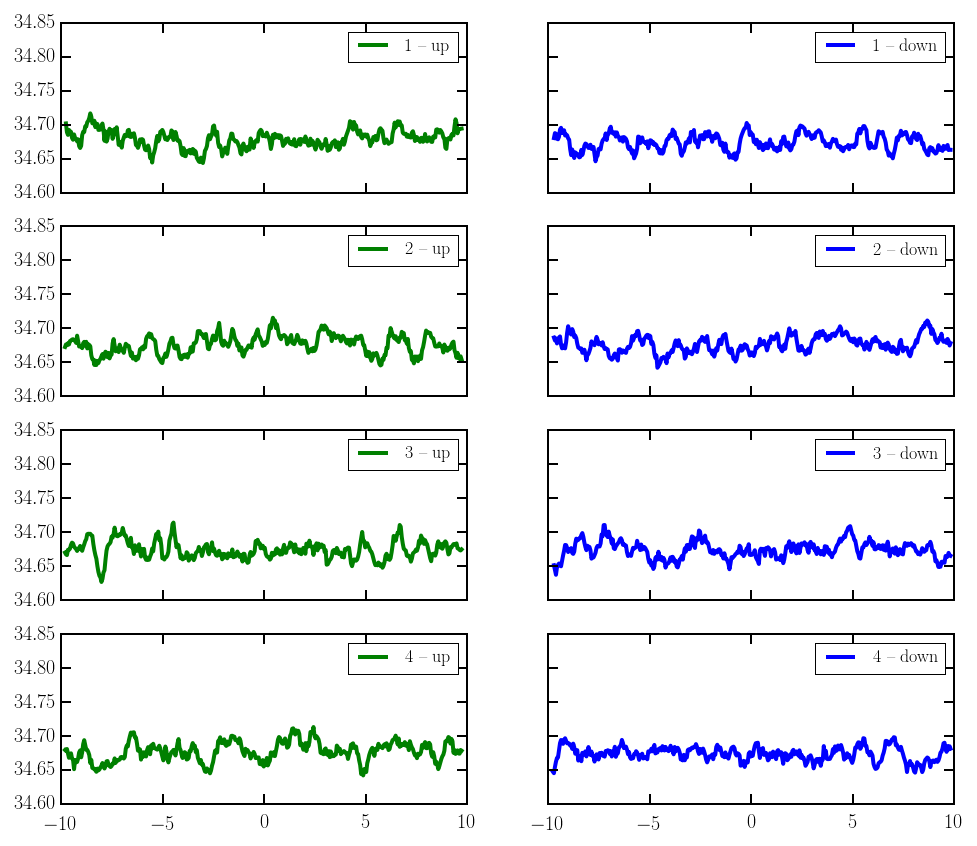

In [30]:
f = data_dir+'gateswp_1-20-6_4K_a.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 up and 5 down sweeps in here

fig, axs = plt.subplots(4,2,sharex = True, sharey=True, 
                        figsize=(16,14))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i % 2 == 0:
        l = '{0} -- up'.format(i/2+1)
        c = 'g'
    else:
        l = '{0} -- down'.format((i-1)/2+1)
        c = 'b'
    N = 10
    gate = pd.rolling_mean(gateswp['Gate'][ind[i]:ind[i+1]], N)
    cond = pd.rolling_mean(gateswp['Gavg'][ind[i]:ind[i+1]], N)
    axs[i].plot(gate, cond/3.875e-5, c = c, label=l)
    axs[i].legend(fontsize = 18)
axs[0].set_ylim(34.6, 34.85)

A little noisier than I would like to see, but it doesn't look like there is any change with the gate.

Same sample, same dunker, moved to a transfer dewar.

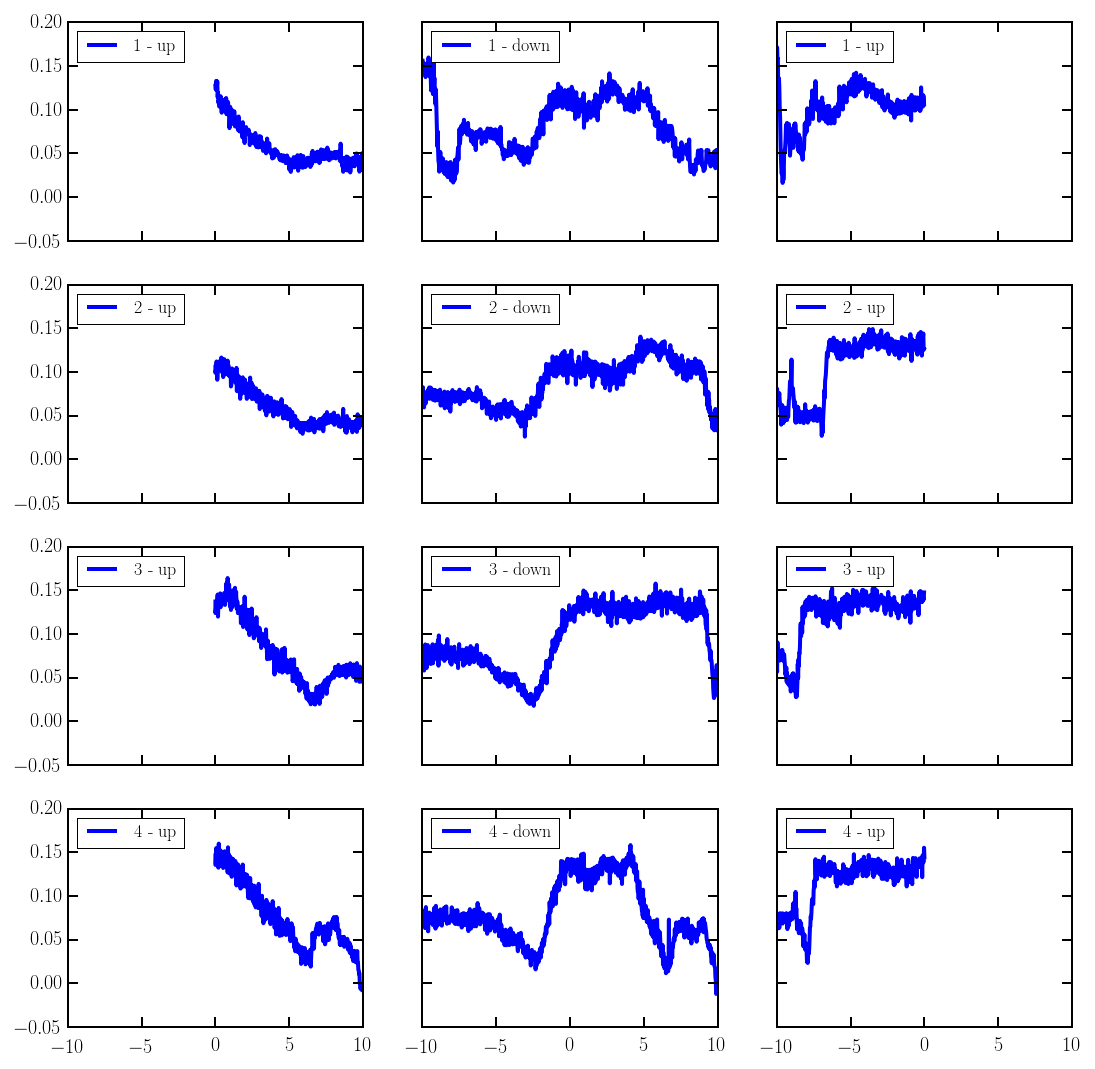

In [31]:
f = data_dir+'gateswp_4-20-6_4K_v.bin'

gateswp = lvdt.get_data_2d(f) #there are 4 'symmetric about start' sweeps in here

fig, axs = plt.subplots(4,3,sharex = True, sharey=True, 
                        figsize=(18,18))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i%3 == 0:
        l = '{0:d} - up'.format(i/3 + 1)
    elif i%3 ==1:
        l = '{0:d} - down'.format((i-1)/3 + 1)
    else:
        l = '{0:d} - up'.format((i-2)/3 + 1)
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Gavg'][ind[i]:ind[i+1]]/3.875e-5,
                label=l)
    axs[i].legend(fontsize = 18, loc = 'upper left')

Not sure what I learned here. Running another one.

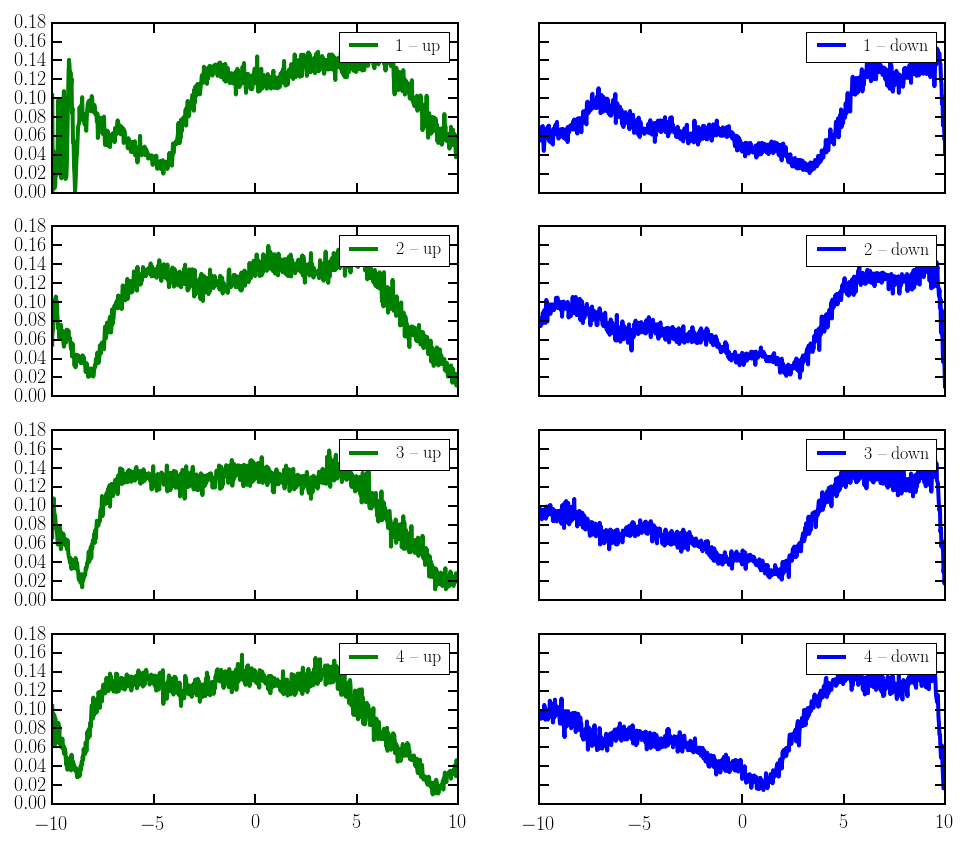

In [32]:
f = data_dir+'gateswp_4-20-6_4K_w.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 up and 5 down sweeps in here

fig, axs = plt.subplots(4,2,sharex = True, sharey=True, 
                        figsize=(16,14))
axs = axs.flat

ind = lvdt.split_sweeps(gateswp, 'Gate')
for i in range(len(ind)-1):
    if i % 2 == 0:
        l = '{0} -- up'.format(i/2+1)
        c = 'g'
    else:
        l = '{0} -- down'.format((i-1)/2+1)
        c = 'b'
    axs[i].plot(gateswp['Gate'][ind[i]:ind[i+1]], gateswp['Gavg'][ind[i]:ind[i+1]]/3.875e-5,
                c = c, label=l)
    axs[i].legend(fontsize = 18)

It doesn't look like much like a quantum dot, and it drifts. I'm done with this thing. 

To summarize from my chart above.... The problem is **not** the dewar/He3 cryostat/dunker. The problem is apparently due to some contamination (of course). My main suspects are the old evaporator introducing some junk (possibly from that old diffusion pump. Or, the pretreatment step of the growth process introducing/baking on some junk.

For the next round of samples:

+ Do **not** use the old evaporator
+ Instead of the long pretreatment of the tube with the samples inside, bake it (empty) at high temperature before loading samples and proceding with normal growth